In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder as lb

In [75]:
twitts_train= pd.read_csv("CSV/task4_csv/twitter_training.csv")
twitts_valid= pd.read_csv("CSV/task4_csv/twitter_validation.csv")

In [81]:
column_name = ["tweet_id","entity","sentiment","tweet_content"]
twitts_train.columns= column_name
twitts_valid.columns = column_name
#  Merging both datasets
data= pd.concat([twitts_train,twitts_valid],ignore_index= False)
data.head()
data.shape

(75680, 4)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [85]:
data.isna().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [91]:
data.columns.tolist()

['tweet_id', 'entity', 'sentiment', 'tweet_content']

In [116]:
data.duplicated().sum()

0

In [118]:
data.dropna(inplace= True)
data.drop_duplicates(inplace=True)
print(data.isnull().sum())
print(data.duplicated().sum())

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64
0


In [125]:
data.drop(columns=['tweet_id','tweet_content'],inplace = True)

In [131]:
data.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


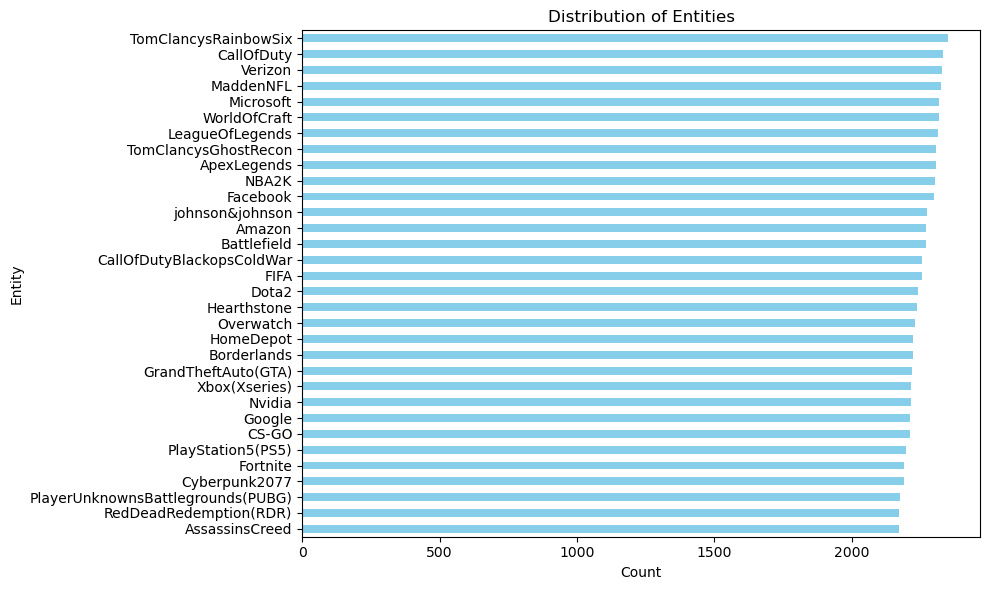

In [137]:

entity_content = data['entity'].value_counts()

plt.figure(figsize=(10, 6))
entity_content.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Distribution of Entities')
plt.gca().invert_yaxis()  # Most common entity on top
plt.tight_layout()
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_10568\2144947048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entity_df, y='Entity', x='Percentage', palette='viridis')


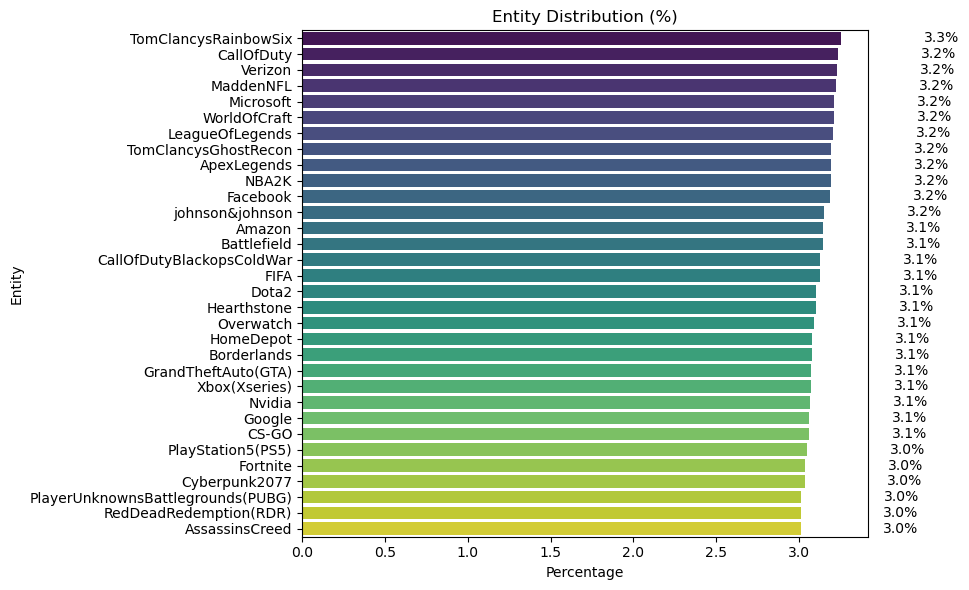

In [144]:
entity_counts = data['entity'].value_counts(normalize=True) * 100
entity_df = entity_counts.reset_index()
entity_df.columns = ['Entity', 'Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(data=entity_df, y='Entity', x='Percentage', palette='viridis')

for index, value in enumerate(entity_df['Percentage']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.title('Entity Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_10568\2880187948.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_df, x='Sentiment', y='Percentage', palette='Set2')


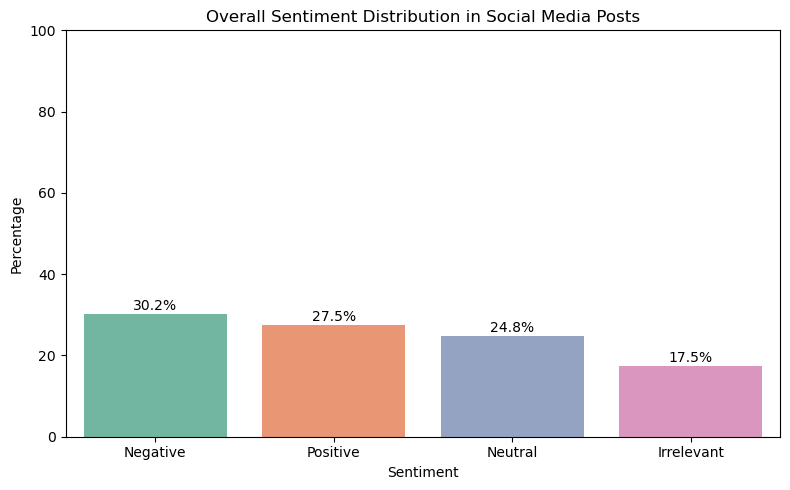

In [146]:
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Percentage']

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=sentiment_df, x='Sentiment', y='Percentage', palette='Set2')

# Annotate bars with %
for i, v in enumerate(sentiment_df['Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.title("Overall Sentiment Distribution in Social Media Posts")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

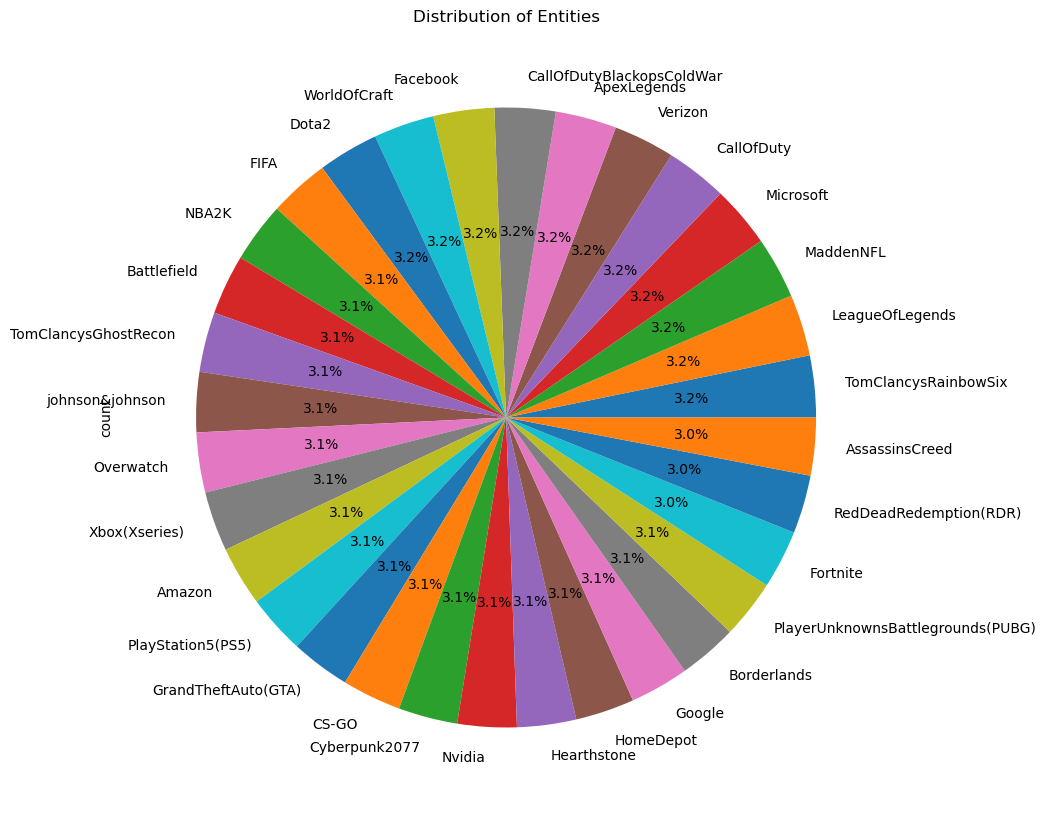

In [151]:
entity_content=twitts['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()